<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [4]:
# Check for GPU
!nvidia-smi

Tue Aug  6 12:27:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              1W /   50W |     110MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"current device: {device}")

2.4.0
current device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

- Self-driving cars, like Tesla
- Camera surveillance, implemented on CCTV on public areas 
- QC in manufactures, cameras with machine learning model embedded on the system for checking quality of products that are about to be delivered

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a condition where a machine learning models perform much better on training rather in the testing. There some reasons why a machine learning models could have a large gap between training accuracy and testing accuracy. Some common issues that could make a machine learning model perform overfitting are:
- too much training, inappropriate amount of time in training a machine learning could lead to this issue

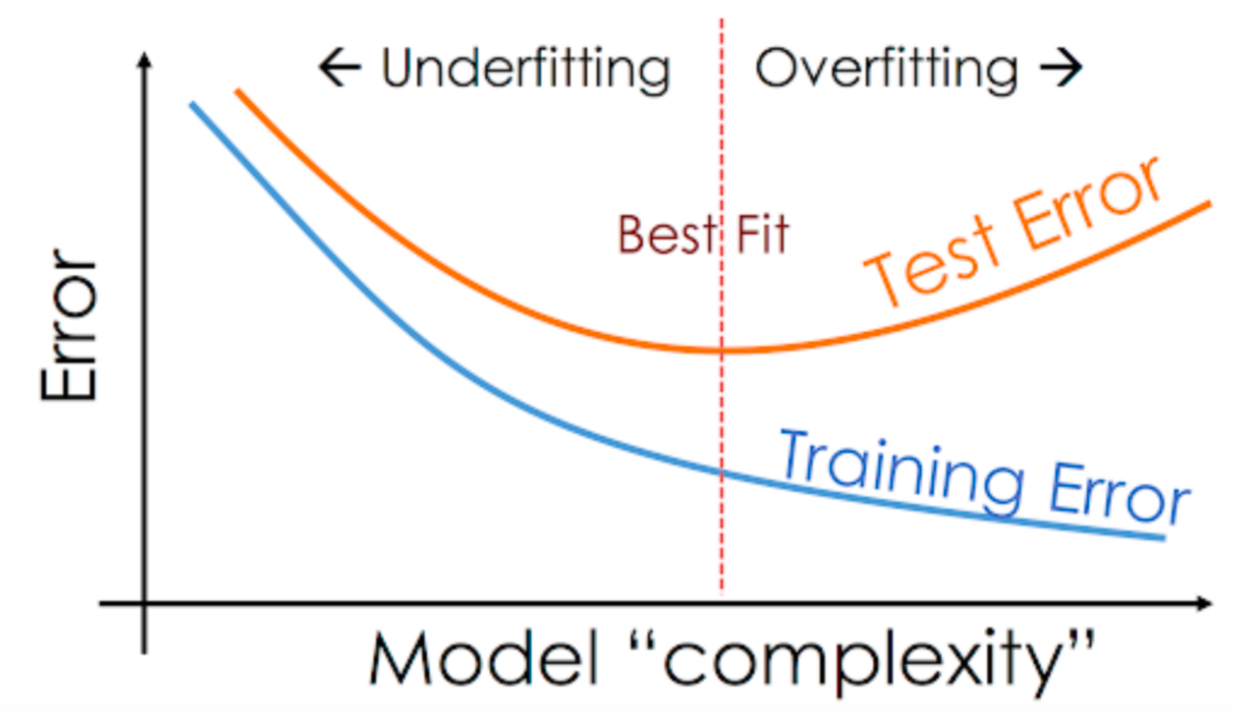

- too much complexity in the model's layers

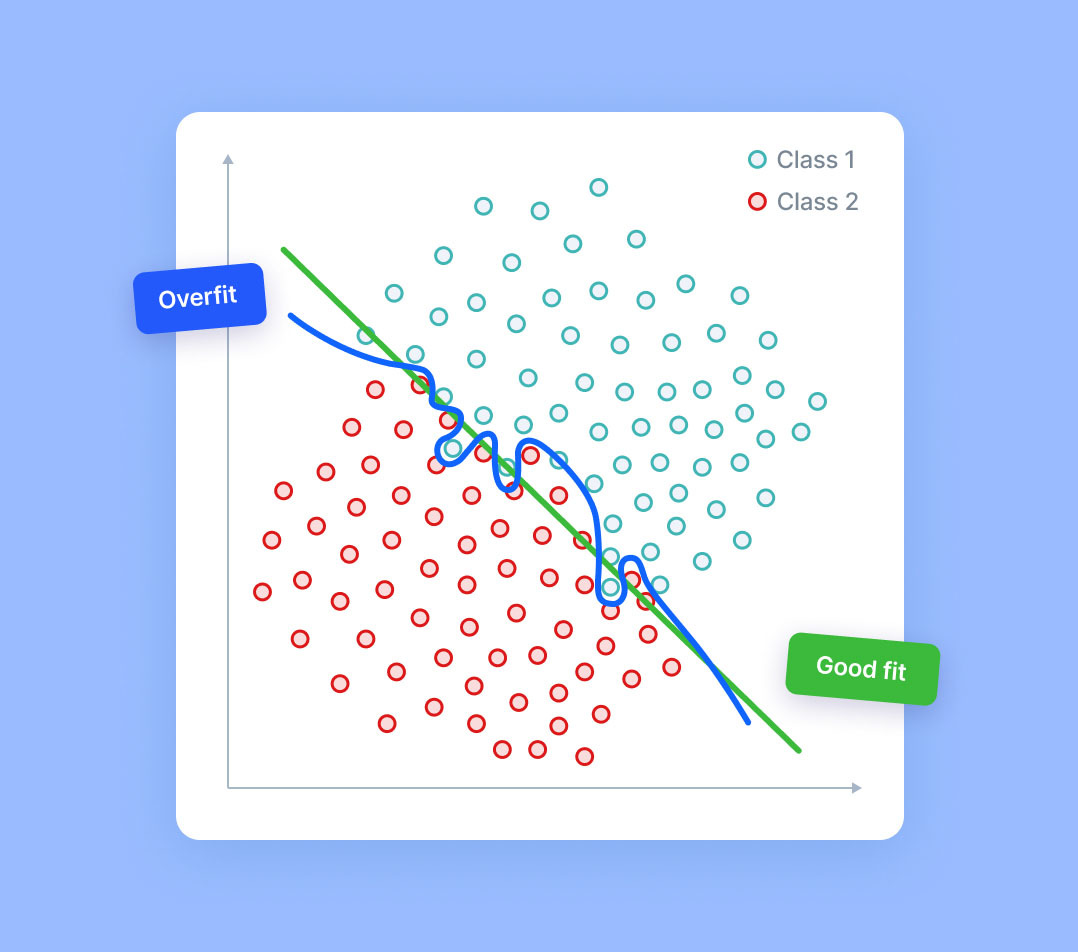

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. early stopping: Pause training model before it learns noises in the data.
2. feature selection: remove unnecessary features if the model has too many for the dataset
3. regularization: add constraints to model's complexity to encourage it to focus on important features and reduce the impact of noise.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

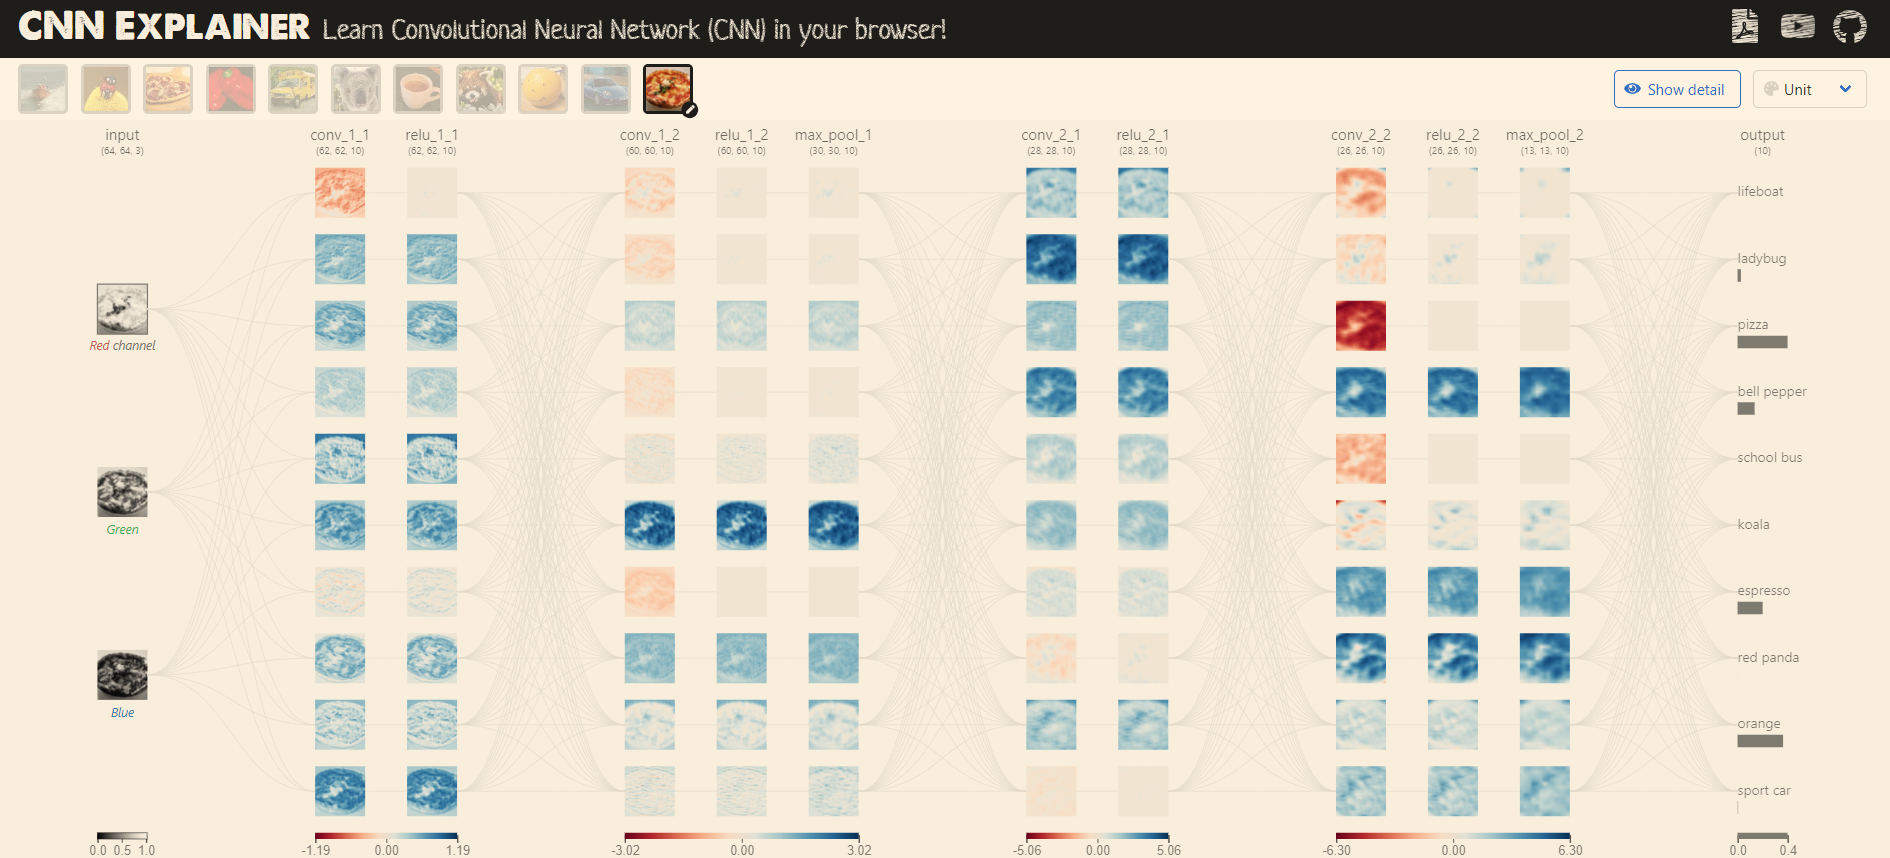

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torchvision.datasets import MNIST 
from torchvision.transforms import ToTensor

training_data = MNIST(root="data", train=True, transform=ToTensor(), download=True)
testing_data = MNIST(root="data", train=False, transform=ToTensor(), download=True)

In [7]:
len(training_data), len(testing_data)

(60000, 10000)

In [216]:
class_names = training_data.classes


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
training_data.targets # labels

tensor([5, 0, 4,  ..., 5, 6, 8])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

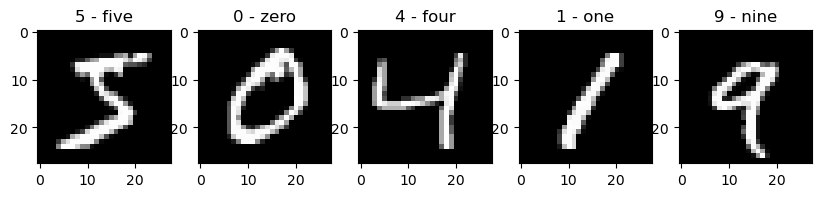

In [10]:
import matplotlib.pyplot as plt 

nrows = 1
ncols = 5
plt.figure(figsize=(10, 10))

for i in range(5):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(training_data.data[i], cmap="gray")
    plt.title(class_names[training_data.targets[i].item()]) # type: ignore

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader 

BATCH_SIZE = 32

training_batches = DataLoader(dataset=training_data, batch_size=BATCH_SIZE, shuffle=True)
testing_batches = DataLoader(dataset=testing_data, batch_size=BATCH_SIZE, shuffle=False)

len(training_batches) # must be equal to 60.000/32

1875

In [12]:
train_features_batch, train_labels_batch = next(iter(training_batches))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [13]:
train, label = next(iter(training_data))
train, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [95]:
from torch import nn

class MNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        # [28, 28, 1] ignore the batch size
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            ## padding == stride will conserve the size in 28x28
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            ## compress the image to 28/2 with maxpool(kernel_size=2, stride=2)
        )

        # [14, 14, 10]
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # [7, 7, 10]
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape),
        )

    def forward(self, x):
        z = self.conv_layer_1(x)
        # print(z.shape)
        z = self.conv_layer_2(z)
        # print(z.shape)
        z = self.classifier(z)
        return z

In [342]:
model_0 = MNISTModelV0(
    input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names) # type: ignore
)
model_0.to(device)
model_0.state_dict()

OrderedDict([('conv_layer_1.0.weight',
              tensor([[[[ 0.1297,  0.2957,  0.1678],
                        [ 0.0416, -0.0611,  0.0707],
                        [ 0.0357,  0.2801,  0.2275]]],
              
              
                      [[[-0.2489, -0.0971,  0.2173],
                        [ 0.1195, -0.0453,  0.0722],
                        [-0.0206,  0.2367, -0.2993]]],
              
              
                      [[[-0.1184,  0.0996, -0.1276],
                        [ 0.0228, -0.1506, -0.1166],
                        [ 0.2420, -0.2794, -0.2027]]],
              
              
                      [[[ 0.2865,  0.3029,  0.2074],
                        [ 0.1362, -0.3099,  0.2805],
                        [-0.1148, -0.1448,  0.3253]]],
              
              
                      [[[ 0.2557,  0.2880, -0.0549],
                        [ 0.0838,  0.1868, -0.1770],
                        [ 0.0721, -0.2052, -0.3117]]],
              
              
      

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [343]:
# setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [344]:
from tqdm.autonotebook import tqdm
from torchmetrics import Accuracy

accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [345]:
# set epochs 
epochs = 5

for epoch in tqdm(range(epochs)): # type: ignore
    model_0.train() # type: ignore

    train_loss, train_accuracy = 0, 0 

    for batch, (X, y) in enumerate(training_batches):
        # send data to target device 
        X, y = X.to(device), y.to(device)
        # forward pass 
        y_logits = model_0(X) # type: ignore 
        # calculate loss 
        loss = loss_fn(y_logits, y)
        train_loss += loss
        # calculate accuracy 
        train_accuracy += accuracy_fn(y_logits.argmax(dim=1), y)
        # optim zero grad 
        optimizer.zero_grad()
        # backprop
        loss.backward()
        # gradient descent 
        optimizer.step()

        if batch % 400 == 0: 
            print(f"looked at {batch * BATCH_SIZE}/{len(training_data)}")
    train_loss /= len(training_batches)
    train_accuracy /= len(training_batches)

    test_loss, test_accuracy = 0, 0
    model_0.eval()
    with torch.inference_mode():
        # test loop
        for X, y in testing_batches:
            # send data to target devices 
            X, y = X.to(device), y.to(device)
            # forward pass 
            test_logits = model_0(X)
            # calculate loss 
            test_loss += loss_fn(test_logits, y)
            # calculate accuracy 
            test_accuracy += accuracy_fn(test_logits.argmax(dim=1), y)
        test_loss /= len(testing_batches)
        test_accuracy /= len(testing_batches)
    
    print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Train accuracy: {train_accuracy:.2f} | Testing loss: {test_loss:.5f}, Testing accuracy: {test_accuracy:.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000


 20%|██        | 1/5 [00:14<00:56, 14.04s/it]

Epoch: 0 | Train loss: 0.32828, Train accuracy: 0.89 | Testing loss: 0.06987, Testing accuracy: 0.98
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000


 40%|████      | 2/5 [00:35<00:55, 18.53s/it]

Epoch: 1 | Train loss: 0.08054, Train accuracy: 0.98 | Testing loss: 0.05747, Testing accuracy: 0.98
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000


 60%|██████    | 3/5 [00:56<00:39, 19.74s/it]

Epoch: 2 | Train loss: 0.06286, Train accuracy: 0.98 | Testing loss: 0.05679, Testing accuracy: 0.98
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000


 80%|████████  | 4/5 [01:16<00:19, 19.83s/it]

Epoch: 3 | Train loss: 0.05376, Train accuracy: 0.98 | Testing loss: 0.04555, Testing accuracy: 0.98
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000


100%|██████████| 5/5 [01:35<00:00, 19.02s/it]

Epoch: 4 | Train loss: 0.04797, Train accuracy: 0.99 | Testing loss: 0.04352, Testing accuracy: 0.99


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [182]:
testing_data[121][0].unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [346]:
def make_prediction(model: torch.nn.Module, sample: torch.Tensor):
    model.eval()
    with torch.inference_mode():
        logits = model(sample.unsqueeze(dim=1).to(device))
        return logits.argmax(dim=1)

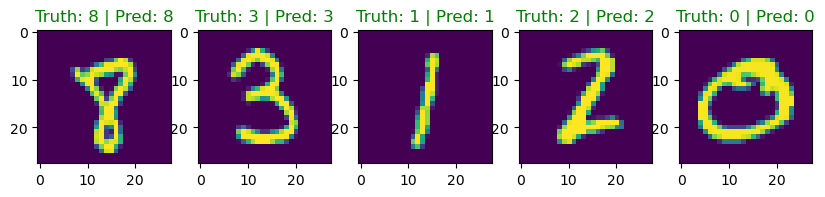

In [347]:
plt.figure(figsize=(10, 10))
for i in range(5):
    random_idx = torch.randint(high=len(testing_data), size=(1,)).item()
    plt.subplot(1, 5, i+1)
    plt.imshow(testing_data.data[random_idx])
    truth_label = testing_data.targets[random_idx].item()
    pred_label = make_prediction(model=model_0, sample=testing_data[random_idx][0]).item()
    title = f"Truth: {truth_label} | Pred: {pred_label}"
    if truth_label == pred_label:
        plt.title(title, c="g")
    else:
        plt.title(title, c="r")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

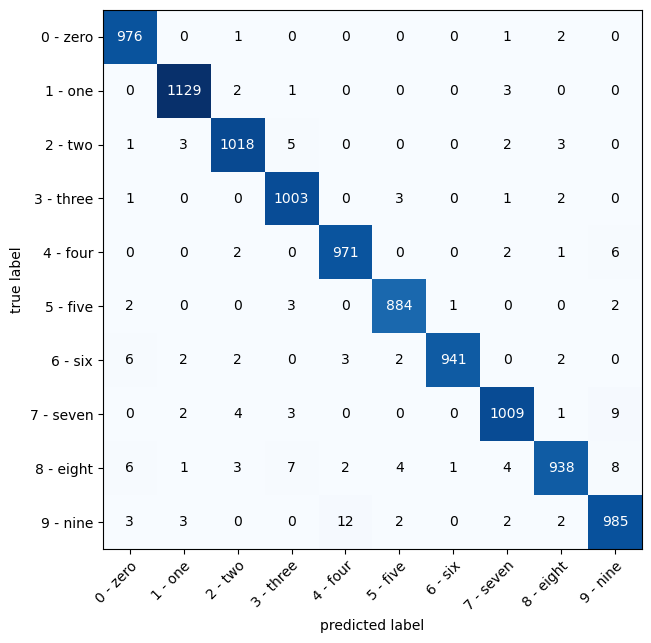

In [351]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

preds = []
for X, _ in testing_data:
    X = X.to(device)
    logits = model_0(X.unsqueeze(dim=0))
    preds.append(logits.argmax(dim=1).to(device))

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names)).to(device)
confmat_values = confmat(torch.cat(preds).squeeze(), testing_data.targets.to(device)).cpu()

fig, ax = plot_confusion_matrix(conf_mat=confmat_values.numpy(), class_names=testing_data.classes, figsize=(10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [239]:
A = torch.randn(size=(1, 3, 64, 64))

conv_layer = nn.Conv2d(
    in_channels=3, 
    out_channels=10, 
    kernel_size=3, 
    stride=1, 
    padding=1
)

conv_layer(A)

tensor([[[[ 0.1711, -0.0601, -0.1483,  ..., -0.4258, -0.0366,  0.6852],
          [-0.1249, -0.4388, -0.6019,  ...,  0.5499, -0.4721, -0.7626],
          [ 0.0171,  0.7475,  0.3878,  ...,  0.1916, -0.1296, -0.2507],
          ...,
          [ 0.1195, -0.4883,  0.5418,  ...,  0.3686, -0.0047, -0.2652],
          [-0.0386, -1.1294,  0.8350,  ...,  0.2028, -0.1096, -0.5033],
          [-0.2791,  0.2449, -0.1773,  ...,  0.1208, -0.5157,  0.0083]],

         [[ 0.0223,  0.0737, -0.0071,  ...,  0.9998, -0.1238, -0.4942],
          [-0.2157,  0.7414, -0.8024,  ..., -0.3070,  1.2870,  0.2122],
          [ 0.4939, -0.7106, -0.5142,  ...,  0.3288, -0.1470, -0.0111],
          ...,
          [-0.2872, -0.5854, -0.4267,  ...,  0.8019, -0.8435, -0.8099],
          [-0.1164, -0.2525, -1.2804,  ..., -0.1546, -0.2444, -0.3100],
          [-0.4361, -0.5069, -0.1882,  ...,  0.1832,  0.2576, -0.1368]],

         [[ 0.5438, -0.1957,  0.1286,  ..., -0.4694,  0.7406,  0.1185],
          [-0.3528,  0.1715,  

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [241]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

train_data = FashionMNIST(root="data", train=True, transform=ToTensor(), download=True)
test_data = FashionMNIST(root="data", train=False, transform=ToTensor(), download=True)

100%|██████████| 26421880/26421880 [01:18<00:00, 336971.12it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 115381.28it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:13<00:00, 333409.71it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5128806.89it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [257]:
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [246]:
fashion_class_names = train_data.classes
fashion_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [285]:
# instantiate a FashionMNISTModel 

fashionMNISTmodel0 = MNISTModelV0(input_shape=1, output_shape=len(fashion_class_names), hidden_units=10).to(device)
fashionMNISTmodel0

MNISTModelV0(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [286]:
# setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=fashionMNISTmodel0.parameters(), lr=0.001)

In [287]:
from torchmetrics import Accuracy 

accuracy_fn = Accuracy(task="multiclass", num_classes=len(fashion_class_names)).to(device)

In [288]:
torch.manual_seed(19)
torch.cuda.manual_seed(19)

# set number of epochs
epochs = 100

for epoch in tqdm(range(epochs)):
    fashionMNISTmodel0.train()

    training_loss, training_accuracy = 0, 0 

    for batch, (X, y) in enumerate(train_dataloader):
        # send the data to target device 
        X, y = X.to(device), y.to(device)
        # forward pass 
        logits = fashionMNISTmodel0(X) 
        # calculate loss 
        loss = loss_fn(logits, y)
        training_loss += loss 
        # calculate accuracy 
        training_accuracy += accuracy_fn(logits.argmax(dim=1), y)
        # optim zero grad 
        optimizer.zero_grad()
        # perform backpropagation
        loss.backward()
        # gradient descent 
        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch * BATCH_SIZE}/{len(train_data)} samples...")
    
    training_loss /= len(train_dataloader)
    training_accuracy /= len(train_dataloader)

    testing_loss, testing_accuracy = 0, 0 

    fashionMNISTmodel0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader: 
            # send data to target device 
            X, y = X.to(device), y.to(device)
            # forward pass 
            test_logits = fashionMNISTmodel0(X) 
            # calculate loss 
            testing_loss += loss_fn(test_logits, y)
            # calculate accuracy 
            testing_accuracy += accuracy_fn(test_logits.argmax(dim=1), y)
        testing_loss /= len(test_dataloader)
        testing_accuracy /= len(test_dataloader)
    print(f"Epoch: {epoch} | Training loss: {train_loss:.5f}, Training accuracy: {training_accuracy:.2f} | Testing loss: {testing_loss:.5f}, Testing accuracy: {testing_accuracy:.2f}")

  0%|          | 0/100 [00:00<?, ?it/s]

looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  1%|          | 1/100 [00:11<19:31, 11.84s/it]

Epoch: 0 | Training loss: 0.06957, Training accuracy: 0.12 | Testing loss: 2.29092, Testing accuracy: 0.17
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  2%|▏         | 2/100 [00:23<18:54, 11.57s/it]

Epoch: 1 | Training loss: 0.06957, Training accuracy: 0.33 | Testing loss: 1.50641, Testing accuracy: 0.57
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  3%|▎         | 3/100 [00:34<18:46, 11.61s/it]

Epoch: 2 | Training loss: 0.06957, Training accuracy: 0.69 | Testing loss: 0.73024, Testing accuracy: 0.74
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  4%|▍         | 4/100 [00:45<18:15, 11.41s/it]

Epoch: 3 | Training loss: 0.06957, Training accuracy: 0.75 | Testing loss: 0.65831, Testing accuracy: 0.76
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  5%|▌         | 5/100 [00:57<18:08, 11.46s/it]

Epoch: 4 | Training loss: 0.06957, Training accuracy: 0.77 | Testing loss: 0.67151, Testing accuracy: 0.75
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  6%|▌         | 6/100 [01:08<17:28, 11.15s/it]

Epoch: 5 | Training loss: 0.06957, Training accuracy: 0.78 | Testing loss: 0.62125, Testing accuracy: 0.77
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  7%|▋         | 7/100 [01:19<17:18, 11.16s/it]

Epoch: 6 | Training loss: 0.06957, Training accuracy: 0.79 | Testing loss: 0.58153, Testing accuracy: 0.79
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  8%|▊         | 8/100 [01:29<16:43, 10.91s/it]

Epoch: 7 | Training loss: 0.06957, Training accuracy: 0.80 | Testing loss: 0.58535, Testing accuracy: 0.78
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


  9%|▉         | 9/100 [01:41<16:48, 11.08s/it]

Epoch: 8 | Training loss: 0.06957, Training accuracy: 0.80 | Testing loss: 0.55390, Testing accuracy: 0.80
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 10%|█         | 10/100 [01:52<16:42, 11.14s/it]

Epoch: 9 | Training loss: 0.06957, Training accuracy: 0.81 | Testing loss: 0.55583, Testing accuracy: 0.79
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 11%|█         | 11/100 [02:03<16:38, 11.22s/it]

Epoch: 10 | Training loss: 0.06957, Training accuracy: 0.82 | Testing loss: 0.53410, Testing accuracy: 0.81
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 12%|█▏        | 12/100 [02:14<16:27, 11.22s/it]

Epoch: 11 | Training loss: 0.06957, Training accuracy: 0.82 | Testing loss: 0.50146, Testing accuracy: 0.83
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 13%|█▎        | 13/100 [02:26<16:12, 11.17s/it]

Epoch: 12 | Training loss: 0.06957, Training accuracy: 0.83 | Testing loss: 0.55728, Testing accuracy: 0.79
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 14%|█▍        | 14/100 [02:36<15:49, 11.05s/it]

Epoch: 13 | Training loss: 0.06957, Training accuracy: 0.83 | Testing loss: 0.50081, Testing accuracy: 0.82
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 15%|█▌        | 15/100 [02:47<15:41, 11.08s/it]

Epoch: 14 | Training loss: 0.06957, Training accuracy: 0.84 | Testing loss: 0.50142, Testing accuracy: 0.82
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 16%|█▌        | 16/100 [02:58<15:23, 11.00s/it]

Epoch: 15 | Training loss: 0.06957, Training accuracy: 0.84 | Testing loss: 0.47279, Testing accuracy: 0.83
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 17%|█▋        | 17/100 [03:09<15:12, 11.00s/it]

Epoch: 16 | Training loss: 0.06957, Training accuracy: 0.84 | Testing loss: 0.47160, Testing accuracy: 0.83
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 18%|█▊        | 18/100 [03:20<14:58, 10.96s/it]

Epoch: 17 | Training loss: 0.06957, Training accuracy: 0.84 | Testing loss: 0.45910, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 19%|█▉        | 19/100 [03:31<14:48, 10.97s/it]

Epoch: 18 | Training loss: 0.06957, Training accuracy: 0.85 | Testing loss: 0.46073, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 20%|██        | 20/100 [03:42<14:38, 10.98s/it]

Epoch: 19 | Training loss: 0.06957, Training accuracy: 0.85 | Testing loss: 0.44744, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 21%|██        | 21/100 [03:53<14:29, 11.01s/it]

Epoch: 20 | Training loss: 0.06957, Training accuracy: 0.85 | Testing loss: 0.44037, Testing accuracy: 0.85
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 22%|██▏       | 22/100 [04:05<14:44, 11.33s/it]

Epoch: 21 | Training loss: 0.06957, Training accuracy: 0.85 | Testing loss: 0.44398, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 23%|██▎       | 23/100 [04:17<14:37, 11.40s/it]

Epoch: 22 | Training loss: 0.06957, Training accuracy: 0.85 | Testing loss: 0.44280, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 24%|██▍       | 24/100 [04:29<14:33, 11.49s/it]

Epoch: 23 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.43431, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 25%|██▌       | 25/100 [04:40<14:18, 11.45s/it]

Epoch: 24 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.42109, Testing accuracy: 0.85
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 26%|██▌       | 26/100 [04:51<14:10, 11.49s/it]

Epoch: 25 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.42314, Testing accuracy: 0.85
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 27%|██▋       | 27/100 [05:03<13:50, 11.37s/it]

Epoch: 26 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.42009, Testing accuracy: 0.85
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 28%|██▊       | 28/100 [05:14<13:45, 11.46s/it]

Epoch: 27 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.41282, Testing accuracy: 0.85
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 29%|██▉       | 29/100 [05:25<13:19, 11.27s/it]

Epoch: 28 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.42933, Testing accuracy: 0.84
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 30%|███       | 30/100 [05:37<13:16, 11.38s/it]

Epoch: 29 | Training loss: 0.06957, Training accuracy: 0.86 | Testing loss: 0.40315, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 31%|███       | 31/100 [05:48<13:09, 11.44s/it]

Epoch: 30 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.41071, Testing accuracy: 0.85
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 32%|███▏      | 32/100 [06:00<13:07, 11.58s/it]

Epoch: 31 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.40793, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 33%|███▎      | 33/100 [06:12<12:56, 11.58s/it]

Epoch: 32 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.39034, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 34%|███▍      | 34/100 [06:23<12:39, 11.51s/it]

Epoch: 33 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.39907, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 35%|███▌      | 35/100 [06:34<12:15, 11.31s/it]

Epoch: 34 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.38731, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 36%|███▌      | 36/100 [06:46<12:08, 11.39s/it]

Epoch: 35 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.38272, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 37%|███▋      | 37/100 [06:57<11:51, 11.30s/it]

Epoch: 36 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.38528, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 38%|███▊      | 38/100 [07:08<11:43, 11.35s/it]

Epoch: 37 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.39473, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 39%|███▉      | 39/100 [07:19<11:31, 11.34s/it]

Epoch: 38 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.39266, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 40%|████      | 40/100 [07:31<11:21, 11.37s/it]

Epoch: 39 | Training loss: 0.06957, Training accuracy: 0.87 | Testing loss: 0.39356, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 41%|████      | 41/100 [07:42<11:14, 11.43s/it]

Epoch: 40 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.37663, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 42%|████▏     | 42/100 [07:54<11:07, 11.50s/it]

Epoch: 41 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36967, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 43%|████▎     | 43/100 [08:06<10:56, 11.52s/it]

Epoch: 42 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.39532, Testing accuracy: 0.86
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 44%|████▍     | 44/100 [08:17<10:42, 11.46s/it]

Epoch: 43 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36751, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 45%|████▌     | 45/100 [08:29<10:34, 11.53s/it]

Epoch: 44 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36181, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 46%|████▌     | 46/100 [08:40<10:20, 11.50s/it]

Epoch: 45 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36102, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 47%|████▋     | 47/100 [08:52<10:19, 11.68s/it]

Epoch: 46 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36467, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 48%|████▊     | 48/100 [09:03<09:57, 11.50s/it]

Epoch: 47 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36252, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 49%|████▉     | 49/100 [09:15<09:50, 11.59s/it]

Epoch: 48 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36401, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 50%|█████     | 50/100 [09:26<09:29, 11.39s/it]

Epoch: 49 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36668, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 51%|█████     | 51/100 [09:38<09:28, 11.60s/it]

Epoch: 50 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.36527, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 52%|█████▏    | 52/100 [09:50<09:18, 11.64s/it]

Epoch: 51 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.34859, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 53%|█████▎    | 53/100 [10:02<09:12, 11.76s/it]

Epoch: 52 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.34815, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 54%|█████▍    | 54/100 [10:14<09:00, 11.74s/it]

Epoch: 53 | Training loss: 0.06957, Training accuracy: 0.88 | Testing loss: 0.35381, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 55%|█████▌    | 55/100 [10:25<08:43, 11.63s/it]

Epoch: 54 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.35457, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 56%|█████▌    | 56/100 [10:36<08:30, 11.60s/it]

Epoch: 55 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.34615, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 57%|█████▋    | 57/100 [10:48<08:16, 11.56s/it]

Epoch: 56 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.34428, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 58%|█████▊    | 58/100 [10:59<08:01, 11.45s/it]

Epoch: 57 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.34919, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 59%|█████▉    | 59/100 [11:11<07:48, 11.44s/it]

Epoch: 58 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.34046, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 60%|██████    | 60/100 [11:22<07:38, 11.46s/it]

Epoch: 59 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.35282, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 61%|██████    | 61/100 [11:33<07:26, 11.45s/it]

Epoch: 60 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33969, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 62%|██████▏   | 62/100 [11:45<07:16, 11.48s/it]

Epoch: 61 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33750, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 63%|██████▎   | 63/100 [11:56<07:03, 11.45s/it]

Epoch: 62 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33589, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 64%|██████▍   | 64/100 [12:08<06:54, 11.52s/it]

Epoch: 63 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.34935, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 65%|██████▌   | 65/100 [12:19<06:41, 11.47s/it]

Epoch: 64 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33175, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 66%|██████▌   | 66/100 [12:31<06:32, 11.56s/it]

Epoch: 65 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33834, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 67%|██████▋   | 67/100 [12:42<06:18, 11.47s/it]

Epoch: 66 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33443, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 68%|██████▊   | 68/100 [12:54<06:10, 11.57s/it]

Epoch: 67 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33676, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 69%|██████▉   | 69/100 [13:05<05:52, 11.38s/it]

Epoch: 68 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33467, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 70%|███████   | 70/100 [13:17<05:44, 11.49s/it]

Epoch: 69 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33217, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 71%|███████   | 71/100 [13:28<05:30, 11.39s/it]

Epoch: 70 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.32445, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 72%|███████▏  | 72/100 [13:40<05:21, 11.48s/it]

Epoch: 71 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.33404, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 73%|███████▎  | 73/100 [13:51<05:10, 11.51s/it]

Epoch: 72 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.32429, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 74%|███████▍  | 74/100 [14:03<05:01, 11.60s/it]

Epoch: 73 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.32378, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 75%|███████▌  | 75/100 [14:15<04:50, 11.63s/it]

Epoch: 74 | Training loss: 0.06957, Training accuracy: 0.89 | Testing loss: 0.32293, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 76%|███████▌  | 76/100 [14:26<04:37, 11.57s/it]

Epoch: 75 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31739, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 77%|███████▋  | 77/100 [14:38<04:24, 11.51s/it]

Epoch: 76 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.32612, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 78%|███████▊  | 78/100 [14:49<04:09, 11.36s/it]

Epoch: 77 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.32105, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 79%|███████▉  | 79/100 [15:00<03:59, 11.40s/it]

Epoch: 78 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.35185, Testing accuracy: 0.87
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 80%|████████  | 80/100 [15:12<03:48, 11.43s/it]

Epoch: 79 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31624, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 81%|████████  | 81/100 [15:23<03:38, 11.51s/it]

Epoch: 80 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.32721, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 82%|████████▏ | 82/100 [15:34<03:24, 11.38s/it]

Epoch: 81 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31900, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 83%|████████▎ | 83/100 [15:46<03:14, 11.47s/it]

Epoch: 82 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.33908, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 84%|████████▍ | 84/100 [15:58<03:03, 11.45s/it]

Epoch: 83 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.32719, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 85%|████████▌ | 85/100 [16:09<02:53, 11.54s/it]

Epoch: 84 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.34537, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 86%|████████▌ | 86/100 [16:21<02:40, 11.47s/it]

Epoch: 85 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31153, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 87%|████████▋ | 87/100 [16:32<02:29, 11.51s/it]

Epoch: 86 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.32094, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 88%|████████▊ | 88/100 [16:44<02:17, 11.44s/it]

Epoch: 87 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.32836, Testing accuracy: 0.88
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 89%|████████▉ | 89/100 [16:55<02:06, 11.50s/it]

Epoch: 88 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31110, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 90%|█████████ | 90/100 [17:06<01:53, 11.37s/it]

Epoch: 89 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31705, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 91%|█████████ | 91/100 [17:18<01:42, 11.43s/it]

Epoch: 90 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.30919, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 92%|█████████▏| 92/100 [17:29<01:30, 11.29s/it]

Epoch: 91 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31055, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 93%|█████████▎| 93/100 [17:40<01:18, 11.28s/it]

Epoch: 92 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31591, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 94%|█████████▍| 94/100 [17:52<01:08, 11.46s/it]

Epoch: 93 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31640, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 95%|█████████▌| 95/100 [18:04<00:57, 11.55s/it]

Epoch: 94 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31573, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 96%|█████████▌| 96/100 [18:16<00:46, 11.65s/it]

Epoch: 95 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31018, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 97%|█████████▋| 97/100 [18:27<00:34, 11.53s/it]

Epoch: 96 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31396, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 98%|█████████▊| 98/100 [18:38<00:23, 11.58s/it]

Epoch: 97 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.30751, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


 99%|█████████▉| 99/100 [18:50<00:11, 11.43s/it]

Epoch: 98 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.30556, Testing accuracy: 0.89
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...


100%|██████████| 100/100 [19:01<00:00, 11.42s/it]

Epoch: 99 | Training loss: 0.06957, Training accuracy: 0.90 | Testing loss: 0.31139, Testing accuracy: 0.89


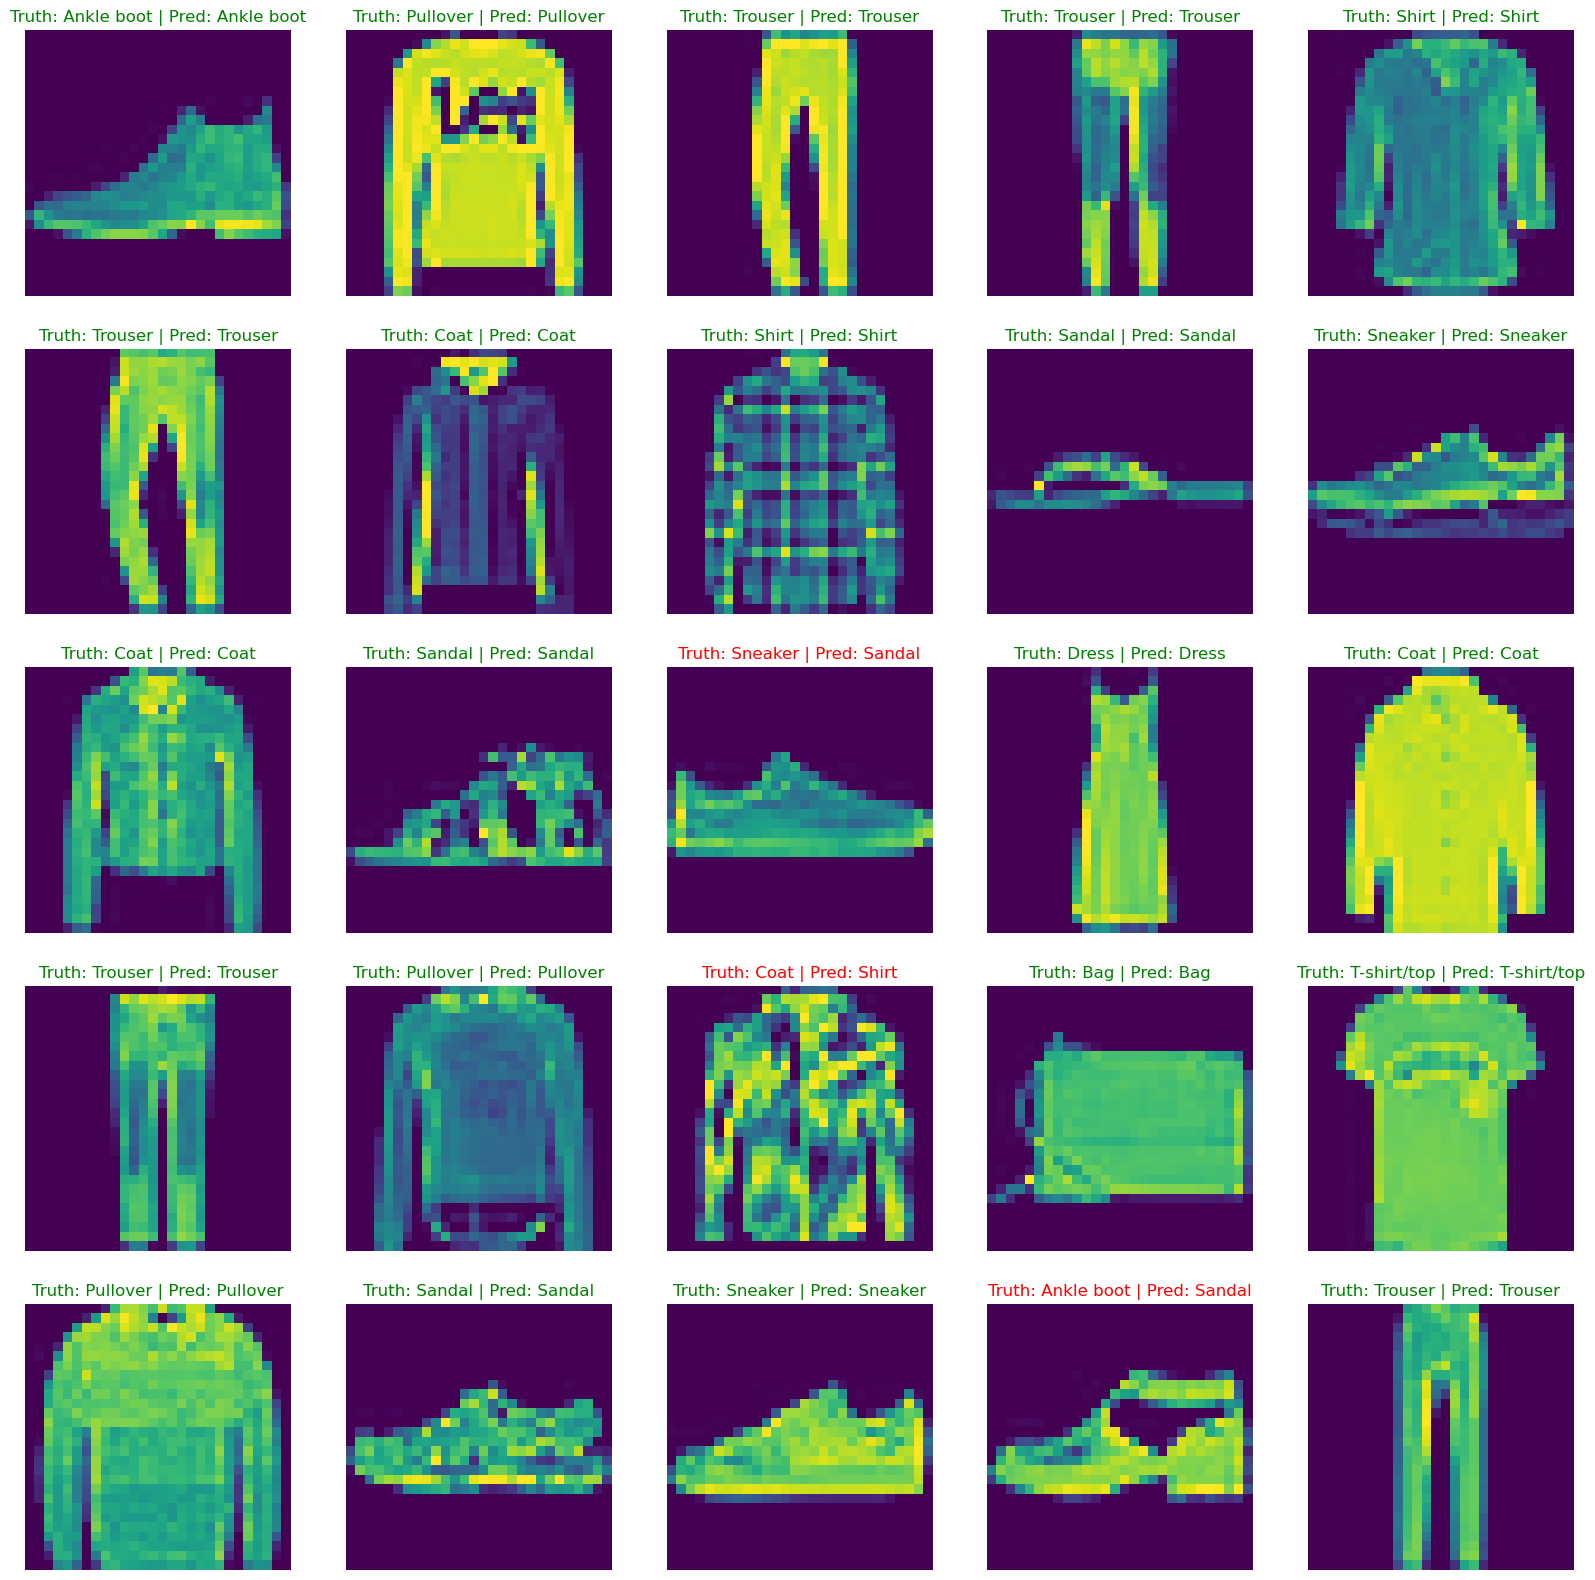

In [356]:
plt.figure(figsize=(20, 20))
nrows = 5
ncols = 5

for i in range(int(nrows*ncols)):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(test_data[i][0].squeeze())
    idx_pred = make_prediction(model=fashionMNISTmodel0, sample=test_data[i][0])
    pred = fashion_class_names[idx_pred.item()]
    truth = fashion_class_names[test_data.targets[i]]
    title = f"Truth: {truth} | Pred: {pred}"
    if pred == truth:
        plt.title(title, c="g")
    else:
        plt.title(title, c="r")
    plt.axis(False)

In [358]:
f_preds = []
for X, _ in tqdm(test_data, desc="making predictions..."):
    # send data to target device 
    fashionMNISTmodel0.eval()
    with torch.inference_mode():
        X = X.to(device)
        # make pred
        pred = fashionMNISTmodel0(X.unsqueeze(dim=1)).argmax(dim=1)
        f_preds.append(pred)
f_preds = torch.cat(f_preds)
f_preds.shape

making predictions...: 100%|██████████| 10000/10000 [00:07<00:00, 1329.35it/s]


torch.Size([10000])

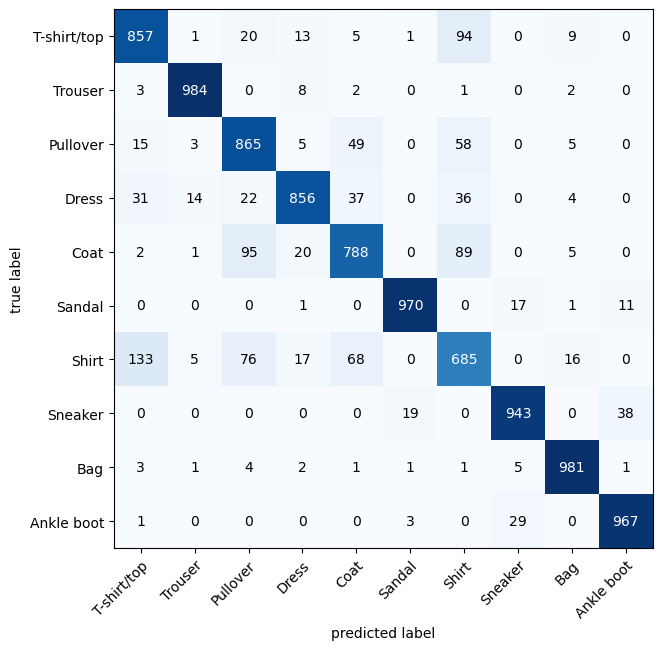

In [350]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(fashion_class_names)).to(device)
confmat_map = confmat(f_preds.squeeze(), test_data.targets.to(device)).cpu()
fig, ax = plot_confusion_matrix(conf_mat=confmat_map.numpy(), class_names=fashion_class_names, figsize=(10,7))

In [368]:
import numpy as np 
f_preds = f_preds.cpu()
wrong_indices = np.where(f_preds != test_data.targets)[0]
len(wrong_indices)

1104